<a href="https://colab.research.google.com/github/Krish-002/Diabetic-Retinopathy-Detection/blob/transfer/AI_ML_Model_DRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

#
Diabetic Retinopathy Detection


# Part 1: Exploratory Data Analysis
1.We are reading the [IDRID Dataset](https://drive.google.com/file/d/12eMHzko_OfTrC-3ghyhqtBqA_cM9gO82/view?usp=sharing) and explore and doing the data analysis like bar plots and looking at the dataframe table (cleaning the unnecessary data and naN values) the .csv files which contain the labels and the image files from the original image directory



### Importing the necessary libraries we use in the code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from  PIL import Image
import os
import cv2
import tqdm
from keras.applications.inception_resnet_v2 import *
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation,GlobalAveragePooling2D
from skimage import measure
from tensorflow.keras.preprocessing import image_dataset_from_directory
from keras.layers import Dense, Dropout, Flatten, Input
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.preprocessing import image
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
import random
import matplotlib.image as mpimg
from PIL import *
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from numpy.random import seed

### Importing the dataset uploaded in our Google Drive

In [ ]:
!gdown https://drive.google.com/drive/folders/1qPzE-sFzsrOXsEb2qEdp2HlzoRV4JKYB?usp=sharing

/usr/local/lib/python2.7/dist-packages/gdown/parse_url.py:31: UserWarning: You specified Google Drive Link but it is not the correct link to download the file. Maybe you should try: https://drive.google.com/uc?id=None
  .format(url='https://drive.google.com/uc?id={}'.format(file_id))
Downloading...
From: https://drive.google.com/drive/folders/1qPzE-sFzsrOXsEb2qEdp2HlzoRV4JKYB?usp=sharing
To: /content/1qPzE-sFzsrOXsEb2qEdp2HlzoRV4JKYB?usp=sharing
91.4kB [00:00, 17.7MB/s]


In [ ]:
#mounting our drive to read the dataset in it
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


## **1. EDA for the labels :-**

# 1.1 Train set

*1.1.1. Reading the labels for our train set*

*1.1.2. Printing the first five rows of our dataframe*

*1.1.3. Finding out the info about our dataframe*

*1.1.4. Cleaning out the columns we don't need for our problem set and printing out the info of our new dataframe*

*1.1.5. Finding out the mean values of the two columns  with data we have (Retinopathy Grade and Risk of Macular Edema) and mode to find out which value occurs the most.*

*1.1.6. Figuring out if the dataframes NaN values and if so fill them in with the mean values we calculated in the previous cell*

*1.1.7 Plotting the Frequency Distribution graph*

#1.2 Test Set

*1.2.1. Repeating the same procedures with the test set*

# 1.3. Printing out the classes of our two data columns



---

*Train Set*


In [ ]:
#reading the labels from our training subset from our dataset
retinopathy_training=pd.read_csv("/content/drive/MyDrive/B. Disease Grading/2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv")
retinopathy_training.head()

,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#printing the information in our dataframe
retinopathy_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Image name              413 non-null    object 
 1   Retinopathy grade       413 non-null    int64  
 2   Risk of macular edema   413 non-null    int64  
 3   Unnamed: 3              0 non-null      float64
 4   Unnamed: 4              0 non-null      float64
 5   Unnamed: 5              0 non-null      float64
 6   Unnamed: 6              0 non-null      float64
 7   Unnamed: 7              0 non-null      float64
 8   Unnamed: 8              0 non-null      float64
 9   Unnamed: 9              0 non-null      float64
 10  Unnamed: 10             0 non-null      float64
 11  Unnamed: 11             1 non-null      object 
dtypes: float64(8), int64(2), object(2)
memory usage: 38.8+ KB


In [ ]:
#since columns 3 through 11 are empty we drop them since its not useful information for our model
retinopathy_training=retinopathy_training.drop(retinopathy_training.columns[3:12],axis=1)
retinopathy_training.head()

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001,3,2
1,IDRiD_002,3,2
2,IDRiD_003,2,2
3,IDRiD_004,3,2
4,IDRiD_005,4,0


In [ ]:
#finding the information after cleaning up the data
retinopathy_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Image name              413 non-null    object
 1   Retinopathy grade       413 non-null    int64 
 2   Risk of macular edema   413 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 9.8+ KB


In [ ]:
#describing our dataframe
retinopathy_training.describe()

,Retinopathy grade,Risk of macular edema
count,413.000000,413.000000
mean,1.719128,1.043584
std,1.387723,0.949215
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2.000000,1.000000
75%,3.000000,2.000000
max,4.000000,2.000000


In [ ]:
# #finding out the mean of our values
# Rpgrade_mean=retinopathy_training['Retinopathy grade'].mean()
# print("The mean of the values of Retinopathy grade is:",Rpgrade_mean)
# RpRisk_mean=retinopathy_training['Risk of macular edema '].mean()
# print("The mean of the values of Risk of macular edema is:", RpRisk_mean)

#finding out of the mode of our values
Rpgrade_mode=retinopathy_training['Retinopathy grade'].mode()
print("The mode of the values of Retinopathy grade is:",Rpgrade_mode)
RpRisk_mode=retinopathy_training['Risk of macular edema '].mode()
print("The mode of the values of Risk of macular edema is:", RpRisk_mode)

#printing out the names of our columns
retinopathy_training.columns

The mode of the values of Retinopathy grade is: 0    2
dtype: int64
The mode of the values of Risk of macular edema is: 0    2
dtype: int64


Index(['Image name', 'Retinopathy grade', 'Risk of macular edema '], dtype='object')

In [ ]:
#Finding the NaN values
retinopathy_training.isnull().sum()

Image name                0
Retinopathy grade         0
Risk of macular edema     0
dtype: int64



---

## Test set

In [ ]:
#reading the labels from our testing subset from our dataset
retinopathy_testing=pd.read_csv("/content/drive/MyDrive/B. Disease Grading/2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv")
retinopathy_testing.head()

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001,4,0
1,IDRiD_002,4,1
2,IDRiD_003,4,0
3,IDRiD_004,4,0
4,IDRiD_005,4,1


Moving the images into different subfolders based on their retinopathy grades

In [ ]:
#this segment of code is required to move images into the different subfolders based on their retinopathy grades.
#it has been commented to prevent errors. Because once the images have been moved into their respective subfolders, then there will be no images in the master directory for the program to move the next time it is executed.


# import shutil

# folder_path = '/content/drive/MyDrive/B. Disease Grading/1. Original Images/a. Training Set/retinopathy_grade'

# for i in range(len(retinopathy_training['Retinopathy grade'])):
#   old_img = os.path.join(folder_path, retinopathy_training['Image name'][i] + '.jpg' )
#   destination = os.path.join(folder_path, str(retinopathy_training['Retinopathy grade'][i]))
#   # new_img = os.path.join(folder_path, str(retinopathy_training['Retinopathy grade'][i]), retinopathy_training['Image name'][i] + '.jpg')
#   shutil.move(old_img,destination)

In [ ]:
#finding the info of our trainset
retinopathy_testing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Image name              103 non-null    object
 1   Retinopathy grade       103 non-null    int64 
 2   Risk of macular edema   103 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


# Plotting bar graphs of the frequency of each case(Retinopathy Grade and Risk of Macular Edema)

-----

###Train set labels

Text(0, 0.5, 'No. of People')

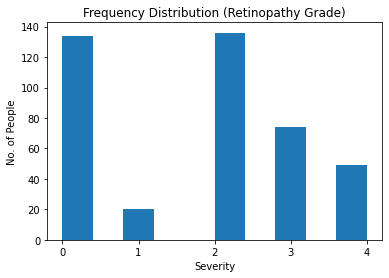

In [ ]:
#Plotting the graph
plt.hist(retinopathy_training['Retinopathy grade'])
#Since we only have 5 classes from 0 to 4
plt.xticks(np.arange(0,5,1))
plt.title('Frequency Distribution (Retinopathy Grade)')
plt.xlabel('Severity')
plt.ylabel('No. of People')

------

### Test Set Labels

Text(0, 0.5, 'No. of Cases')

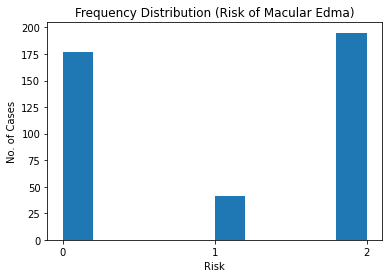

In [ ]:
#Plotting the graph
plt.hist(retinopathy_training['Risk of macular edema '])
plt.title('Frequency Distribution (Risk of Macular Edma)')
plt.xticks(np.arange(0,3,1))
plt.xlabel('Risk')
plt.ylabel('No. of Cases')

# 1.3 Classes for our data

In [ ]:
#Figuring out the classes of our data for Retinopathy grade
retinopathy_training['Retinopathy grade'].unique()

array([3, 2, 4, 1, 0])

In [ ]:
#Figuring out the classes f our data for Risk of Macular Edema
retinopathy_training["Risk of macular edema "].unique()

array([2, 0, 1])



---



---



# 2. Our Image datasets

*2.1. Reading our files after getting paths*

*2.2. Displaying 10 images from our train set*

*2.3. Data Augmentation*

*2.4. Contrasting the image*



## Making an array for the paths of our images for each of our files for Retinopathy Grade

In [ ]:
#Main directory
allimg_datapath='/content/drive/MyDrive/B. Disease Grading'

#Joining a path for our training set of Retinopathy grade
train_direc=os.path.join(allimg_datapath,'1. Original Images','a. Training Set', 'retinopathy_grade')
#getting the names of our files in the directory
train_dir=os.listdir(train_direc)
#Sorting them in alphabetical order to match our labels file
train_directory=sorted(train_dir)
trainfinaldir=[]
#we're joining our main path and the names of our files and adding it into a list to get the filepaths we need
for i in train_directory:
  trainfindir=str(os.path.join(train_direc,i))
  trainfinaldir.append(trainfindir)

#convert the list into an array
trainfinaldir=np.array(trainfinaldir)

#do the same
test_direc=os.path.join(allimg_datapath,'1. Original Images','b. Testing Set', 'retinopathy_grade')
test_dir=os.listdir(test_direc)
test_directory=sorted(test_dir)
testfinaldir=[]
for i in test_directory:
  testfindir=os.path.join(test_direc,i)
  testfinaldir.append(testfindir)

testfinaldir=np.array(testfinaldir)

Using Contrast to show the features more clearly

Text(0.5, 1.2, 'Contrasted Image')

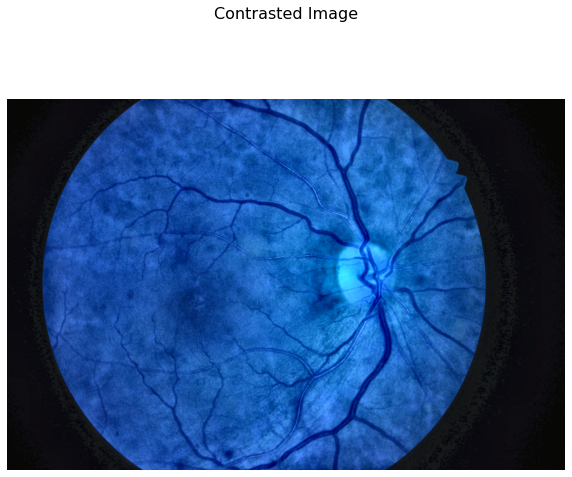

In [ ]:
def contrast(imgpath, cliplimit=4.0, tilesize=16):#i took help from stackoverflow and towardsdatascience for the syntax
    y = cv2.cvtColor(imgpath, cv2.COLOR_BGR2LAB)
    y_planes = cv2.split(y)
    contrasting = cv2.createCLAHE(4,(16,16))
    y_planes[0] = contrasting.apply(y_planes[0])
    y = cv2.merge(y_planes)
    imgpath = cv2.cvtColor(y, cv2.COLOR_LAB2BGR)
    return imgpath

imgpath = cv2.imread('/content/drive/MyDrive/B. Disease Grading/1. Original Images/a. Training Set/retinopathy_grade/0/IDRiD_118.jpg')
mn = contrast(imgpath)
plt.figure(figsize=(10,10))
plt.imshow(mn)
plt.axis('off')
plt.title('Contrasted Image', y=1.2, fontsize=16)

In [ ]:
from keras.applications.inception_v3 import preprocess_input

In [ ]:
def apply_brightness_contrast(input_img, brightness = 6.3, contrast = 58.6):

    if brightness != 0:
        if brightness > 0:
            shadow = brightness
            highlight = 255
        else:
            shadow = 0
            highlight = 255 + brightness
        alpha_b = (highlight - shadow)/255
        gamma_b = shadow

        buf = cv2.addWeighted(input_img, alpha_b, input_img, 0, gamma_b)
    else:
        buf = input_img.copy()

    if contrast != 0:
        f = 131*(contrast + 127)/(127*(131-contrast))
        alpha_c = f
        gamma_c = 127*(1-f)

        buf = cv2.addWeighted(buf, alpha_c, buf, 0, gamma_c)

    return buf

Creating a generator for Retinopathy Grade

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input, validation_split = 0.2,rotation_range=90,horizontal_flip=True)

# We will use the same directory with a validation split of 0.2

train_generator=train_datagen.flow_from_directory(train_direc,classes = ['0', '1', '2', '3', '4'],
                                                    batch_size = 32,
                                                    subset = 'training',
                                                    shuffle = True, class_mode='categorical')

validation_generator=train_datagen.flow_from_directory(train_direc, classes = ['0', '1', '2', '3', '4'],
                                                    batch_size = 32,
                                                    subset = 'validation',
                                                    shuffle = False,class_mode='categorical')

class_names = train_generator.class_indices

reverse_class = {j:i for i,j in class_names.items()}




Found 333 images belonging to 5 classes.
Found 80 images belonging to 5 classes.


To put our data into different datasets in the path file

In [ ]:
# import shutil

# folder_path = '/content/drive/MyDrive/B. Disease Grading/1. Original Images/a. Training Set'

# for i in range(len(retinopathy_training['Retinopathy grade'])):
#   old_img = os.path.join(folder_path, retinopathy_training['Image name'][i] + '.jpg' )
#   new_img = os.path.join(folder_path, str(retinopathy_training['Retinopathy grade'][i]), retinopathy_training['Image name'][i] + '.jpg')
#   shutil.move(old_img,new_img)


Displaying our images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


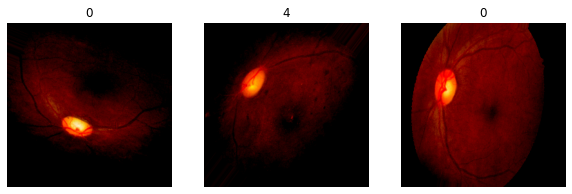

In [ ]:
plt.figure(figsize=(10,10))
image,labels=train_generator.next()
for i in range(3):
    img = image[i]
    plt.subplot(1,3,i+1)
    plt.axis('off')
    plt.imshow(img)
    plt.title(reverse_class[np.argmax(labels[i])])
plt.show()


# Training Part

*Custom Model*

*Transfer Learning using InceptionResNetV2*

In [ ]:
init = tf.keras.initializers.GlorotNormal(seed=1000)
model_wotl= Sequential()
model_wotl.add(Conv2D(600,kernel_size=(7,7),strides=(2,2),padding='same',input_shape=(256,256,3),kernel_initializer=init))
model_wotl.add(MaxPooling2D((2,2)))

model_wotl.add(Conv2D(450,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=init))
model_wotl.add(MaxPooling2D((2,2)))

model_wotl.add(Conv2D(328,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=init))
model_wotl.add(MaxPooling2D((2,2)))

model_wotl.add(Conv2D(164,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=init))
model_wotl.add(MaxPooling2D((2,2)))

model_wotl.add(Conv2D(64,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=init))
model_wotl.add(MaxPooling2D((2,2)))

model_wotl.add(Flatten())

model_wotl.add(Dense(512,activation='relu'))
model_wotl.add(Dropout(0.5))

model_wotl.add(Dense(256,activation='relu'))
model_wotl.add(Dropout(0.5))

model_wotl.add(Dense(128,activation='relu'))
model_wotl.add(Dropout(0.5))

model_wotl.add(Dense(5,activation='softmax'))

model_wotl.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 600)     88800     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 600)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 450)       2430450   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 450)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 328)       1328728   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 328)      0

In [ ]:
model_wotl.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
history_modelwotl= model_wotl.fit(train_generator,epochs=30,batch_size=32,validation_data=(validation_generator))
model_wotl.save('Without Transfer learning.h5')

In [ ]:
fig, ax = plt.subplots(1,2,figsize =(10,5))

#plotting train and test loss
ax[0].set_title('Loss')
ax[0].plot(history_modelwotl.history['loss'],color='blue',label='Train Loss')
ax[0].plot(history_modelwotl.history['val_loss'],color='orange',label='Test Loss')
ax[0].set_xlabel('No. of Epoch')
ax[0].set_ylabel('MSE Loss')
ax[0].legend()

#plotting train and test accuracy
ax[1].set_title('Accuracy')
ax[1].plot(history_modelwotl.history['accuracy'],color='green',label='Train Accuracy')
ax[1].plot(history_modelwotl.history['val_accuracy'],color='red',label='Test Accuracy')
ax[1].set_xlabel('No. of Epoch')
ax[1].set_ylabel('MSE Loss')
ax[1].legend()

In [ ]:
# import shutil

# folder_path = '/content/drive/MyDrive/B. Disease Grading/1. Original Images/b. Testing Set/retinopathy_grade'

# for i in range(len(retinopathy_testing['Retinopathy grade'])):
#   old_img = os.path.join(folder_path, retinopathy_testing['Image name'][i] + '.jpg' )
#   new_img = os.path.join(folder_path, str(retinopathy_testing['Retinopathy grade'][i]), retinopathy_testing['Image name'][i] + '.jpg')
#   shutil.move(old_img, new_img)

# import shutil

# folder_path = '/content/drive/MyDrive/B. Disease Grading/1. Original Images/b. Testing Set/macular_edema'

# for i in range(len(retinopathy_testing['Risk of macular edema '])):
#   old_img = os.path.join(folder_path, retinopathy_testing['Image name'][i] + '.jpg' )
#   new_img = os.path.join(folder_path, str(retinopathy_testing['Risk of macular edema '][i]), retinopathy_testing['Image name'][i] + '.jpg')
#   shutil.move(old_img, new_img)


# import shutil

# folder_path = '/content/drive/MyDrive/B. Disease Grading/1. Original Images/b. Training Set/macular_edema'

# for i in range(len(retinopathy_training['Risk of macular edema '])):
#   old_img = os.path.join(folder_path, retinopathy_training['Image name'][i] + '.jpg' )
#   new_img = os.path.join(folder_path, str(retinopathy_training['Risk of macular edema '][i]), retinopathy_training['Image name'][i] + '.jpg')
#   shutil.move(old_img, new_img)

# import shutil

# folder_path = '/content/drive/MyDrive/B. Disease Grading/1. Original Images/a. Training Set/retinopathy_grade'

# for i in range(len(retinopathy_training['Retinopathy grade'])):
#   old_img = os.path.join(folder_path, retinopathy_training['Image name'][i] + '.jpg' )
#   destination = os.path.join(folder_path, str(retinopathy_training['Retinopathy grade'][i]))
#   # new_img = os.path.join(folder_path, str(retinopathy_training['Retinopathy grade'][i]), retinopathy_training['Image name'][i] + '.jpg')
#   shutil.move(old_img,destination)


In [ ]:
# #test_direc -- variable

# test_datagen = ImageDataGenerator()

# # We will use

# test_generator=test_datagen.flow_from_directory(test_direc, classes = ['0', '1', '2'],
#                                                     batch_size = 32, class_mode='categorical')


# class_names_test = test_generator.class_indices

# reverse_class_test = {j:i for i,j in class_names_test.items()}



In [ ]:
# plt.figure(figsize = (10,10))
# imagepred, labels = test_generator.next()
# for i in range(5):
#   ax = plt.subplot(5,1,i+1)
#   x=model_wotl.predict(np.expand_dims(imagepred[i],axis=0))
#   plt.axis('off')
#   plt.imshow(imagepred[i])
#   xi=(reverse_class_test[np.argmax(x)])
#   yi=reverse_class_test[np.argmax(labels[i])]
#   plt.title("guess: "+xi+"  correct: "+yi)

InceptionResNet model for transfer layer

In [ ]:
base_model=InceptionResNetV2(
                          input_shape=(256,256,3),
                          include_top=False,
                          weights='imagenet',
                          classifier_activation='sigmoid')
base_model.trainable=True

x=GlobalAveragePooling2D()(base_model.output)
x=Dense(1024, activation='relu')(x)
x=Dense(512, activation='relu')(x)
preds=Dense(5, activation='softmax')(x)
model_inception= Model(base_model.inputs,preds)
model_inception.summary()

219070464/219055592 [==============================] - 2s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d_5[0][0]']               
 alization)                

In [ ]:
model_inception.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history_mi=model_inception.fit(train_generator,epochs=50,batch_size=32,validation_data=validation_generator)
model_inception.save('With Transfer learning Inception.h5')

Epoch 1/50
11/11 [==============================] - 551s 47s/step - loss: 1.5024 - accuracy: 0.3664 - val_loss: 1.5706 - val_accuracy: 0.2875
Epoch 2/50
11/11 [==============================] - 500s 45s/step - loss: 1.1166 - accuracy: 0.5556 - val_loss: 8.4501 - val_accuracy: 0.3375
Epoch 3/50
11/11 [==============================] - 508s 48s/step - loss: 1.0645 - accuracy: 0.5556 - val_loss: 59.9962 - val_accuracy: 0.1125
Epoch 4/50
11/11 [==============================] - 500s 45s/step - loss: 0.9082 - accuracy: 0.6036 - val_loss: 44.9580 - val_accuracy: 0.3375
Epoch 5/50
11/11 [==============================] - 502s 45s/step - loss: 0.9804 - accuracy: 0.5526 - val_loss: 9.0671 - val_accuracy: 0.3000
Epoch 6/50
11/11 [==============================] - 502s 45s/step - loss: 0.8683 - accuracy: 0.6096 - val_loss: 1.8826 - val_accuracy: 0.3375
Epoch 7/50
11/11 [==============================] - 507s 46s/step - loss: 0.8729 - accuracy: 0.6396 - val_loss: 1.2573 - val_accuracy: 0.5000
Epoc

In [ ]:
fig, ax = plt.subplots(1,2,figsize =(10,5))

#plotting train and test loss
ax[0].set_title('Loss')
ax[0].plot(history_mi.history['loss'],color='blue',label='Train Loss')
ax[0].plot(history_mi.history['val_loss'],color='orange',label='Test Loss')
ax[0].set_xlabel('No. of Epoch')
ax[0].set_ylabel('MSE Loss')
ax[0].legend()

#plotting train and test accuracy
ax[1].set_title('Accuracy')
ax[1].plot(history_mi.history['accuracy'],color='green',label='Train Accuracy')
ax[1].plot(history_mi.history['val_accuracy'],color='red',label='Test Accuracy')
ax[1].set_xlabel('No. of Epoch')
ax[1].set_ylabel('MSE Loss')
ax[1].legend()

In [ ]:
plt.figure(figsize = (10,10))
imagepred, labels = test_generator.next()
for i in range(5):
  ax = plt.subplot(5,1,i+1)
  x=model_inception.predict(np.expand_dims(imagepred[i],axis=0))
  plt.axis('off')
  plt.imshow(imagepred[i])
  xi=(reverse_class_test[np.argmax(x)])
  yi=reverse_class_test[np.argmax(labels[i])]
  plt.title("guess: "+xi+"  correct: "+yi)

Saliency Map

In [ ]:
# def model_modifier(m):
#   m.classifier_activation = 'linear'
#   return m

# def saliency_graphs(model_inception, img):
#   saliency = Saliency(model, model_modifier, clone=False)
#   input_image =  np.expand_dims(img, axis=0)
#   y_pred = model.predict(input_image)
#   class_idxs_sorted = np.argsort(y_pred.flatten())[::-1]
#   for i, class_idx in enumerate(class_idxs_sorted[:5]):
#     loss = lambda output: tf.keras.backend.mean(output[:, class_idx])
#     saliency_map = saliency(loss, input_image[0,...], smooth_samples=20)
#     saliency_map = normalize(saliency_map)
#     plot_saliency_map(saliency_map,img,y_pred,i,class_idx)

# def plot_saliency_map(sal_map, img, y_pred, i, class_idx):

#   fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
#   ax[0].imshow(img, cmap ='jet')

#   j = ax[1].imshow(sal_map[0],cmap="jet",alpha=0.8)
#   fig.colorbar(j)

#   for axe in ax:
#     axe.grid(False)
#     axe.axis('off')
#   plt.show()


# saliency_graphs(model_inception, train_generator[0][0][6])

SAME THING FOR MACULAR EDEMA

In [ ]:
edema_train_direc=os.path.join(allimg_datapath, '1. Original Images','a. Training Set', 'macular_edema')
edema_train_dir=os.listdir(train_direc)
edema_train_directory=sorted(train_dir)
edema_trainfinaldir=[]
for i in edema_train_directory:
  edema_trainfindir=os.path.join(edema_train_direc,i)
  edema_trainfinaldir.append(edema_trainfindir)

edema_trainfinaldir=np.array(edema_trainfinaldir)

edema_test_direc=os.path.join(allimg_datapath, '1. Original Images','b. Testing Set', 'macular_edema')
edema_test_dir=os.listdir(edema_test_direc)
edema_test_directory=sorted(edema_test_dir)
edema_testfinaldir=[]
for i in edema_test_directory:
  edema_testfindir=os.path.join(edema_test_direc,i)
  edema_testfinaldir.append(edema_testfindir)

edema_testfinaldir=np.array(edema_testfinaldir)

In [ ]:
# import shutil

# folder_path = '/content/drive/MyDrive/B. Disease Grading/1. Original Images/a. Training Set/macular_edema'

# for i in range(len(retinopathy_training['Retinopathy grade'])):
#   old_img = os.path.join(folder_path, retinopathy_training['Image name'][i] + '.jpg' )
#   new_img = os.path.join(folder_path, str(retinopathy_training['Retinopathy grade'][i]), retinopathy_training['Image name'][i] + '.jpg')
#   shutil.move(old_img, new_img)


In [ ]:
# We will use the same directory with a validation split of 0.2

edema_train_generator=train_datagen.flow_from_directory(edema_train_direc,classes = ['0', '1', '2'],
                                                    batch_size = 32,
                                                    subset = 'training',
                                                    shuffle = True, class_mode='categorical')

edema_validation_generator=train_datagen.flow_from_directory(edema_train_direc, classes = ['0', '1', '2'],
                                                    batch_size = 32,
                                                    subset = 'validation',
                                                    shuffle = False,class_mode='categorical')
edema_class_names = edema_train_generator.class_indices

edema_reverse_class = {j:i for i,j in edema_class_names.items()}



In [ ]:
plt.figure(figsize=(10,10))
image,labels=edema_train_generator.next()
for i in range(3):
    img = image[i]
    plt.subplot(1,3,i+1)
    plt.axis('off')
    con = contrast(img)
    plt.imshow(con)
    plt.title(edema_reverse_class[np.argmax(labels[i])])
plt.show()


In [ ]:
init = tf.keras.initializers.GlorotNormal(seed=1000)
emodel_wotl= Sequential()
emodel_wotl.add(Conv2D(600,kernel_size=(7,7),strides=(2,2),padding='same',input_shape=(256,256,3),kernel_initializer=init))
emodel_wotl.add(MaxPooling2D((2,2)))

emodel_wotl.add(Conv2D(450,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=init))
emodel_wotl.add(MaxPooling2D((2,2)))

emodel_wotl.add(Conv2D(328,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=init))
emodel_wotl.add(MaxPooling2D((2,2)))

emodel_wotl.add(Conv2D(164,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=init))
emodel_wotl.add(MaxPooling2D((2,2)))

emodel_wotl.add(Conv2D(64,kernel_size=(3,3),padding="same", activation="relu",kernel_initializer=init))
emodel_wotl.add(MaxPooling2D((2,2)))

emodel_wotl.add(Flatten())

emodel_wotl.add(Dense(512,activation='relu'))
emodel_wotl.add(Dropout(0.2))

emodel_wotl.add(Dense(256,activation='relu'))
emodel_wotl.add(Dropout(0.2))

emodel_wotl.add(Dense(128,activation='relu'))
emodel_wotl.add(Dropout(0.2))

emodel_wotl.add(Dense(3,activation='softmax'))

emodel_wotl.summary()

In [ ]:
emodel_wotl.compile(loss='categorical_crossentropy',optimizer=Adam(learning_rate=0.0001),metrics=['accuracy'])
history_emodelwotl= emodel_wotl.fit(edema_train_generator,epochs=45,batch_size=32,validation_data=(edema_validation_generator))
emodel_wotl.save('Without Transfer learning edema.h5')

In [ ]:
#test_direc -- variable

Etest_datagen = ImageDataGenerator()

# We will use

Etest_generator=Etest_datagen.flow_from_directory(edema_test_direc, classes = ['0', '1', '2'],
                                                    batch_size = 32, class_mode='categorical')


Eclass_names_test = Etest_generator.class_indices

Ereverse_class_test = {j:i for i,j in Eclass_names_test.items()}



In [ ]:
fig, ax = plt.subplots(1,2,figsize =(10,5))

#plotting train and test loss
ax[0].set_title('Loss')
ax[0].plot(history_emodelwotl.history['loss'],color='blue',label='Train Loss')
ax[0].plot(history_emodelwotl.history['val_loss'],color='orange',label='Test Loss')
ax[0].set_xlabel('No. of Epoch')
ax[0].set_ylabel('MSE Loss')
ax[0].legend()

#plotting train and test accuracy
ax[1].set_title('Accuracy')
ax[1].plot(history_emodelwotl.history['accuracy'],color='green',label='Train Accuracy')
ax[1].plot(history_emodelwotl.history['val_accuracy'],color='red',label='Test Accuracy')
ax[1].set_xlabel('No. of Epoch')
ax[1].set_ylabel('MSE Loss')
ax[1].legend()

In [ ]:
plt.figure(figsize = (10,10))
imagepred, labels = test_generator.next()
for i in range(5):
  ax = plt.subplot(5,1,i+1)
  x=emodel_wotl.predict(np.expand_dims(imagepred[i],axis=0))
  plt.axis('off')
  plt.imshow(imagepred[i])
  xi=(Ereverse_class_test[np.argmax(x)])
  yi=Ereverse_class_test[np.argmax(labels[i])]
  plt.title("guess: "+xi+"  correct: "+yi)

In [ ]:
ebase_model=InceptionResNetV2(
                          input_shape=(256,256,3),
                          include_top=False,
                          weights='imagenet',
                          classifier_activation='sigmoid',)
ebase_model.trainable=True

ex=GlobalAveragePooling2D()(ebase_model.output)
ex=Conv2D(64,(3,3),activation='relu')(ex)
ex=MaxPooling2D((2,2))(ex)
ex=Conv2D(32,(3,3),activation='relu')(ex)
ex=MaxPooling2D((2,2))(ex)
ex=Flatten()(ex)
ex=Dense(1024, activation='relu')(ex)
ex=Dense(512, activation='relu')(ex)
epreds=Dense(3, activation='softmax')(ex)
emodel_inception= Model(ebase_model.inputs,epreds)
emodel_inception.summary()

In [ ]:
emodel_inception.compile=(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
ehistory_mi=emodel_inception.fit(edema_train_generator,epochs=35,batch_size=32,validation_data=edema_validation_generator)
emodel_inception.save('With Transfer learning Inception.h5')

In [ ]:
fig, ax = plt.subplots(1,2,figsize =(10,5))

#plotting train and test loss
ax[0].set_title('Loss')
ax[0].plot(ehistory_mi.history['loss'],color='blue',label='Train Loss')
ax[0].plot(ehistory_mi.history['val_loss'],color='orange',label='Test Loss')
ax[0].set_xlabel('No. of Epoch')
ax[0].set_ylabel('MSE Loss')
ax[0].legend()

#plotting train and test accuracy
ax[1].set_title('Accuracy')
ax[1].plot(ehistory_mi.history['accuracy'],color='green',label='Train Accuracy')
ax[1].plot(ehistory_mi.history['val_accuracy'],color='red',label='Test Accuracy')
ax[1].set_xlabel('No. of Epoch')
ax[1].set_ylabel('MSE Loss')
ax[1].legend()

In [ ]:
plt.figure(figsize = (10,10))
imagepred, labels = Etest_generator.next()
for i in range(5):
  ax = plt.subplot(5,1,i+1)
  x=emodel_inception.predict(np.expand_dims(imagepred[i],axis=0))
  plt.axis('off')
  plt.imshow(imagepred[i])
  xi=(Ereverse_class_test[np.argmax(x)])
  yi=Ereverse_class_test[np.argmax(labels[i])]
  plt.title("guess: "+xi+"  correct: "+yi)